## Detrented and lagged cross correlations

All possible features:

Let $k$ be the number of nearest neighbors , $N$ be the set of detrending orders, $L$ be the set of lags, and $D$ be the set of pooling depths.

We have $n + 1$ detrended movies, so there are $(k + 1) \, |L| \, |N| \, |D| \, $ NN x-correlations per pixel. Reasonable values are $N=\{0, 1, 2\}$, $L=\{0, 1, 2\}$, and $D=\{0, 1, 2\}$. Also, $k=8$. Therefore, there are $9 \times 3 \times 3 \times 3 = 243$ features. More conservatively, we could have $9 \times 2 \times 2 \times 2 = 72$ features.

In [3]:
%matplotlib inline

import os
import sys
notebook_path = os.path.abspath('.')
sources_path = os.path.abspath(os.path.join(notebook_path, '..'))
sys.path.insert(0, sources_path)

import matplotlib.pylab as plt
import numpy as np
import torch
import logging

from cellmincer.opto_ws import OptopatchBaseWorkspace
from cellmincer.opto_features import OptopatchGlobalFeatureExtractor

device = torch.device("cuda")
dtype = torch.float32

def new_fig(figsize=(15, 5)):
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    return fig, ax

logger = logging.getLogger()
log_info = logger.warning

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

In [4]:
# list of Optopatch movies
opto_mov_path_list = [
    '/home/jupyter/mb-ml-dev-disk/data/Optopatch/sami_data/D1_FOV3_W2_at135105.npy',
    '/home/jupyter/mb-ml-dev-disk/data/Optopatch/sami_data/D4_FOV2_W2_at171603.npy',
    '/home/jupyter/mb-ml-dev-disk/data/Optopatch/sami_data/D4_FOV3_W2_at172029.npy',
    '/home/jupyter/mb-ml-dev-disk/data/Optopatch/sami_data/E3_FOV1_W2_at155440.npy',
    '/home/jupyter/mb-ml-dev-disk/data/Optopatch/sami_data/F1_FOV2_W1_at143005.npy'
]

# names
opto_mov_prefixes = [
    'D1_FOV3_W2_at135105',
    'D4_FOV2_W2_at171603',
    'D4_FOV3_W2_at172029',
    'E3_FOV1_W2_at155440',
    'F1_FOV2_W1_at143005'
]

# output
output_path = '/home/jupyter/mb-ml-dev-disk/data/Optopatch/denoised_data'
feature_path = '/home/jupyter/mb-ml-dev-disk/data/Optopatch/feature_data'
model_root = '/home/jupyter/mb-ml-dev-disk/CellMincer/saved_models'

if not os.path.exists(feature_path):
    os.mkdir(feature_path)

if not os.path.exists(output_path):
    os.mkdir(output_path)
    
if not os.path.exists(model_root):
    os.mkdir(model_root)

In [27]:
i_dataset = 4
ws_base = OptopatchBaseWorkspace(
    opto_mov_path=opto_mov_path_list[i_dataset],
    logger=logger)

Loading movie from /home/jupyter/mb-ml-dev-disk/data/Optopatch/sami_data/F1_FOV2_W1_at143005.npy ...


In [28]:
feature_extractor = OptopatchGlobalFeatureExtractor(
    ws_base=ws_base,
    logger=logger)

Calculating x-corr (0, -1, -1) at depth 0 for detrended movie...
Calculating x-corr (0, -1, -1) at depth 0 for the trend...
Calculating x-corr (0, -1, 0) at depth 0 for detrended movie...
Calculating x-corr (0, -1, 0) at depth 0 for the trend...
Calculating x-corr (0, -1, 1) at depth 0 for detrended movie...
Calculating x-corr (0, -1, 1) at depth 0 for the trend...
Calculating x-corr (0, 0, -1) at depth 0 for detrended movie...
Calculating x-corr (0, 0, -1) at depth 0 for the trend...
Calculating x-corr (0, 0, 1) at depth 0 for detrended movie...
Calculating x-corr (0, 0, 1) at depth 0 for the trend...
Calculating x-corr (0, 1, -1) at depth 0 for detrended movie...
Calculating x-corr (0, 1, -1) at depth 0 for the trend...
Calculating x-corr (0, 1, 0) at depth 0 for detrended movie...
Calculating x-corr (0, 1, 0) at depth 0 for the trend...
Calculating x-corr (0, 1, 1) at depth 0 for detrended movie...
Calculating x-corr (0, 1, 1) at depth 0 for the trend...
Calculating x-corr (1, -1, -

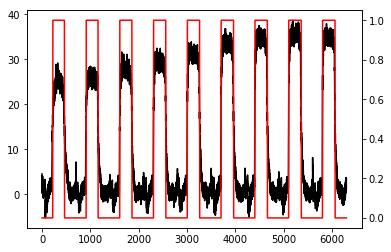

In [29]:
fig = plt.figure()
ax = plt.gca()
ax2 = ax.twinx()
ax.plot(np.mean(ws_base.movie_txy, axis=(-1, -2)), color='black')
ax2.plot(feature_extractor.active_mask_t, color='red')

## Save features

In [30]:
import pickle
with open(os.path.join(feature_path, opto_mov_prefixes[i_dataset] + "__features.pkl"), 'wb') as f:
    pickle.dump(feature_extractor.features, f)

## Exploration

detrended_std_0
0


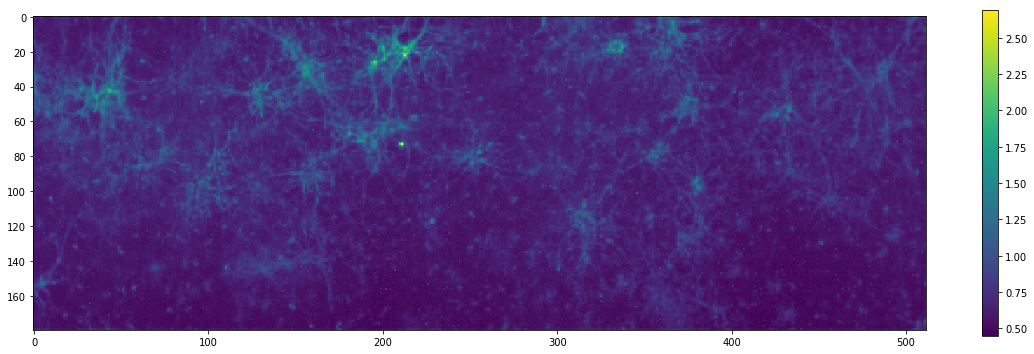

In [35]:
fig = plt.figure(figsize=(20, 6))

features = feature_extractor.features

idx = 0
print(features.feature_name_list[idx])
print(features.feature_depth_list[idx])
im = plt.imshow(features.feature_array_list[idx].T)
plt.colorbar(im)